In [6]:
import pandas as pd

# Load the dataset
file_path = 'movies_metadata.csv'
movies_data = pd.read_csv(file_path, low_memory=False)

# Display initial dataset overview
print("\n-------------- Task 1.1 Data Set Info --------------")
print("Dataset Info:")
print(movies_data.info())

print("\n-------------- Task 1.2 Data Set First Few Rows --------------")
print("\nFirst few rows:")
print(movies_data.head())



-------------- Task 1.1 Data Set Info --------------
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null 

In [21]:
import pandas as pd

print("\n-------------- Task 2 General Statistics --------------")

# Handle missing values for runtime and fill with the mean
movies_data['runtime'] = movies_data['runtime'].fillna(movies_data['runtime'].mean())  # Fill missing runtimes

# Convert 'budget' and 'revenue' to numeric (coerce errors to NaN)
movies_data['budget'] = pd.to_numeric(movies_data['budget'], errors='coerce')
movies_data['revenue'] = pd.to_numeric(movies_data['revenue'], errors='coerce')

# Fill NaN values in 'budget' and 'revenue' explicitly
movies_data['budget'] = movies_data['budget'].fillna(0)
movies_data['revenue'] = movies_data['revenue'].fillna(0)

# Convert 'release_date' to datetime format, coercing errors to NaT (Not a Time)
movies_data['release_date'] = pd.to_datetime(movies_data['release_date'], errors='coerce')

# General Statistics
print("\nGeneral Statistics:")
print("Total Movies:", movies_data.shape[0])
print("Average Runtime:", movies_data['runtime'].mean())
print("Average Budget:", movies_data['budget'].mean())
print("Average Revenue:", movies_data['revenue'].mean())
print("Vote Average:", movies_data['vote_average'].mean())



-------------- Task 2 General Statistics --------------

General Statistics:
Total Movies: 45466
Average Runtime: 94.12819945578833
Average Budget: 4224300.061518498
Average Revenue: 11207869.278031936
Vote Average: 5.618207215134185



-------------- Task 3 Genre Statistics --------------
Genre Statistics:
                                    Genre  Count
6                                   Drama  20265
1                                  Comedy  13182
9                                Thriller   7624
5                                 Romance   6735
7                                  Action   6596
10                                 Horror   4673
8                                   Crime   4307
17                            Documentary   3932
3                               Adventure   3496
12                        Science Fiction   3049
2                                  Family   2770
13                                Mystery   2467
4                                 Fantasy   2313
0                               Animation   1935
15                                Foreign   1622
16                                  Music   1598
11                                History   1398
14                                    War   1

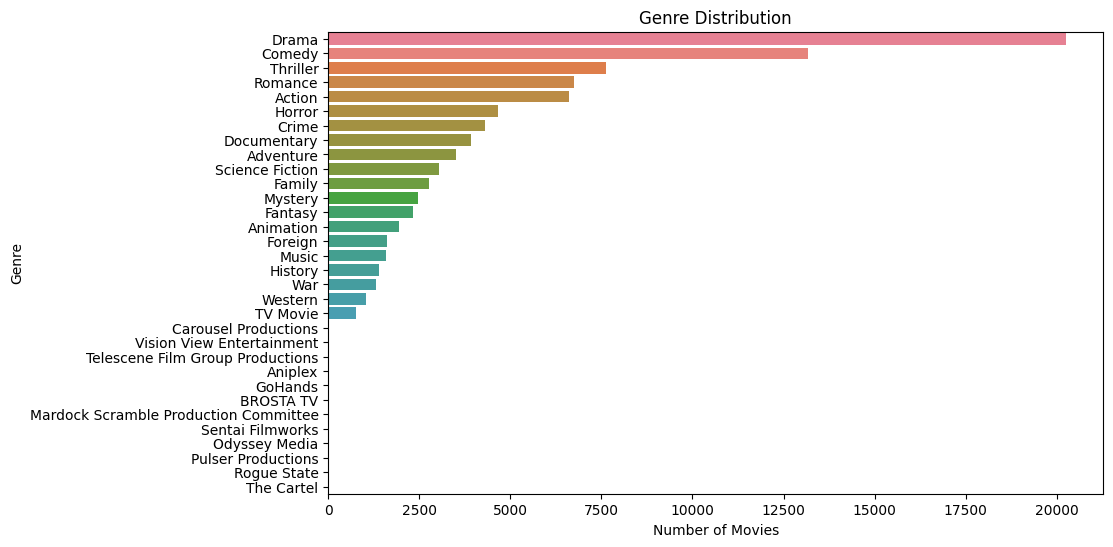

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import ast

print("\n-------------- Task 3 Genre Statistics --------------")
def extract_genres(genres_column):
    try:
        genres = ast.literal_eval(genres_column)  # Convert string to list
        return [genre['name'] for genre in genres]  # Extract genre names
    except (ValueError, SyntaxError):
        return []

# Apply the extraction function
movies_data['genres_list'] = movies_data['genres'].apply(extract_genres)

# Flatten the list of genres for analysis
all_genres = [genre for genres in movies_data['genres_list'] for genre in genres]

# Calculate genre frequencies
from collections import Counter
genre_counts = Counter(all_genres)

# Convert to DataFrame for easier handling
genre_stats = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Print the genre statistics
print("Genre Statistics:")
print(genre_stats)

# Plot the genre statistics
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_stats, x='Count', y='Genre', hue='Genre', dodge=False, legend=False)
plt.title('Genre Distribution')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

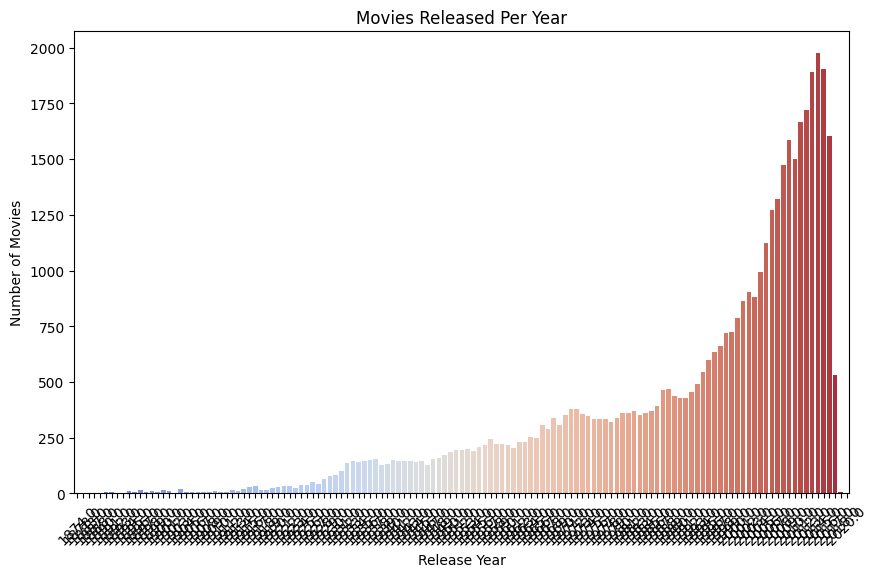

In [24]:
# Plot the distribution of release years with 'x' as 'hue' to avoid the warning
plt.figure(figsize=(10, 6))
sns.countplot(data=movies_data, x='release_year', hue='release_year', palette='coolwarm', legend=False)
plt.title('Movies Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

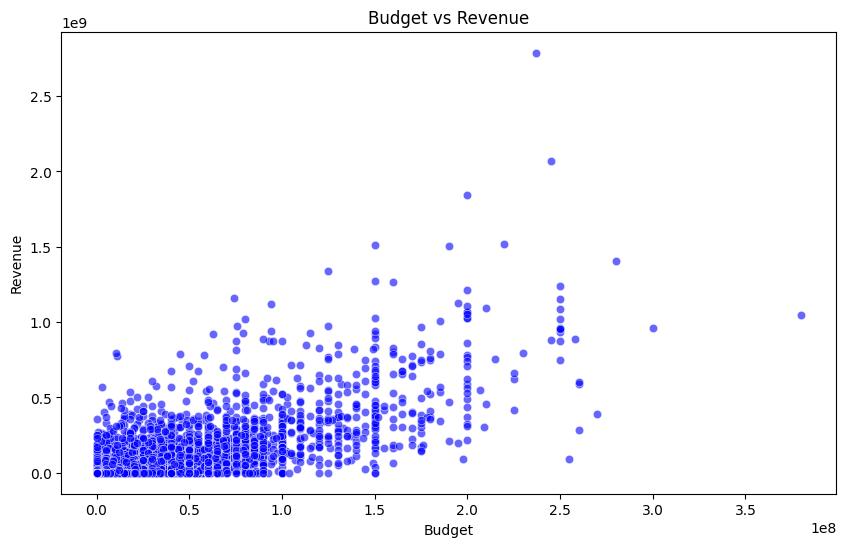

In [30]:
# Scatter plot to compare 'budget' vs 'revenue'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_data, x='budget', y='revenue', alpha=0.6, color='blue')
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
# plt.xscale('log')  # Log scale for better comparison if there are extreme outliers
# plt.yscale('log')  # Log scale for better comparison if there are extreme outliers
plt.show()

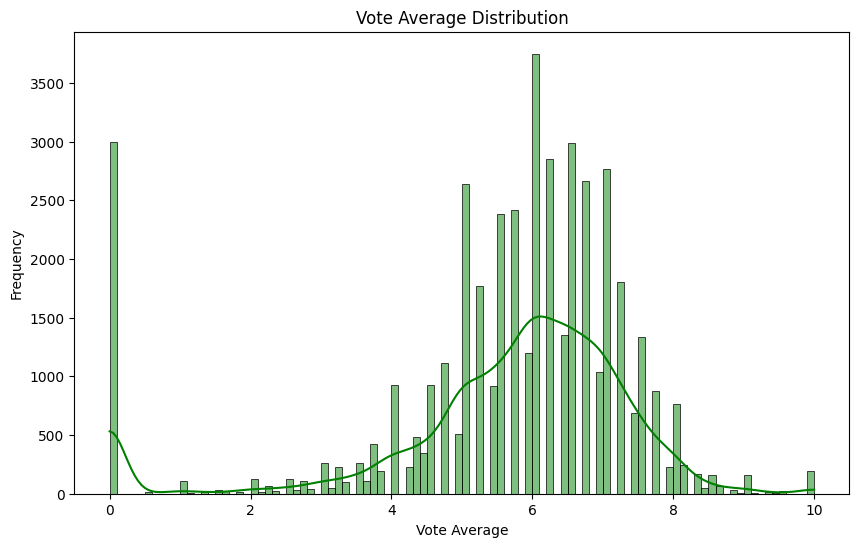

In [38]:
# Plot the distribution of 'vote_average'
plt.figure(figsize=(10, 6))
sns.histplot(movies_data['vote_average'], kde=True, color='green')
plt.title('Vote Average Distribution')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()


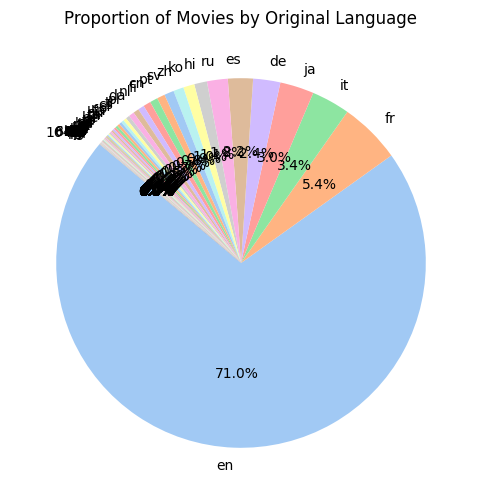

In [32]:
# Pie Chart: Movies by Original Language
language_counts = movies_data['original_language'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Movies by Original Language')
plt.show()


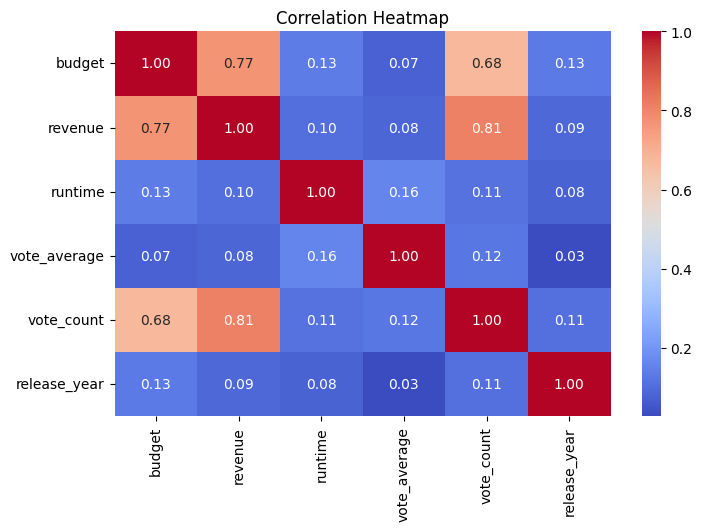

In [34]:
# Select only numeric columns for correlation
numeric_cols = movies_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numeric columns
correlation_matrix = movies_data[numeric_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
